In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
data = pd.read_excel('/content/Online Retail.xlsx')

In [102]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Data Cleaning and Preparation**

In [103]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [104]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [105]:
data.fillna("na",inplace=True)

<ipython-input-105-9c5e7a2a7179>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'na' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("na",inplace=True)


In [106]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [107]:
newData = data[data['Quantity'] > 0]

In [108]:
newData[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,531285.000000,531285.000000
mean,10.655262,3.857296
std,156.830323,41.810047
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [109]:
newData['InvoiceDate'] = pd.to_datetime(newData['InvoiceDate'])

<ipython-input-109-7526730e2b87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['InvoiceDate'] = pd.to_datetime(newData['InvoiceDate'])


In [110]:
newData['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [111]:
newData['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [112]:
newData['InvoiceDate'].count()

531285

In [113]:
newData['InvoiceDate'].max() - newData['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

Insights:


*   Dataset did not have null values for important feature related to analysis.
*   customer id and description has null values and is filled with na.
*   dataset had quantity with negative values which is not related and is error it is filtered out and was assigned to new dataset.
*   statistical analysis on quantity and rate


*   dataset contains data of 373 days transactions from 12-2011 to 12-2010

*   total dated incoices where 531285.







**Sales Analysis**

In [114]:
topSales = newData.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

In [115]:
topSales.head(10)

,Quantity
StockCode,
23843,80995
23166,78033
22197,56921
84077,55047
85099B,48478
85123A,41664
84879,36461
21212,36419
23084,31722


In [116]:
newData['TotalSales'] = newData['Quantity'] * newData['UnitPrice']

<ipython-input-116-46a02cab24aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['TotalSales'] = newData['Quantity'] * newData['UnitPrice']


In [117]:
totalRevenue = newData.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False)

In [118]:
totalRevenue

,TotalSales
StockCode,
DOT,206248.77
22423,174484.74
23843,168469.60
85123A,104518.80
47566,99504.33
...,...
20950,0.00
35600A,0.00
35592T,0.00


In [119]:
totalRevenue.head(10)

,TotalSales
StockCode,
DOT,206248.77
22423,174484.74
23843,168469.60
85123A,104518.80
47566,99504.33
85099B,94340.05
23166,81700.92
M,78110.27
POST,78101.88


In [120]:
newData['InvoiceDate'] = pd.to_datetime(newData['InvoiceDate'])
newData['YearMonth'] = newData['InvoiceDate'].dt.to_period('M')

<ipython-input-120-c74675367678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['InvoiceDate'] = pd.to_datetime(newData['InvoiceDate'])
<ipython-input-120-c74675367678>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['YearMonth'] = newData['InvoiceDate'].dt.to_period('M')


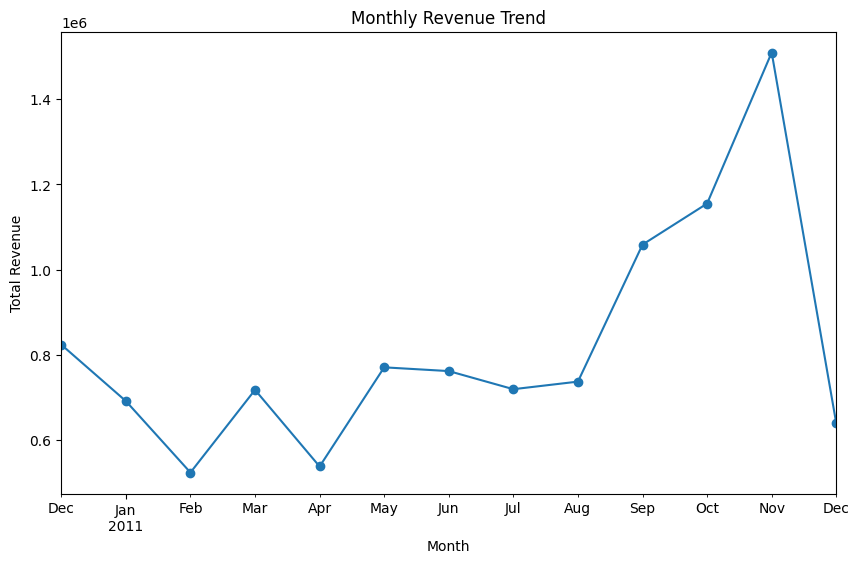

In [121]:
monthlyRevenue = newData.groupby('YearMonth')['TotalSales'].sum()

plt.figure(figsize=(10, 6))
monthlyRevenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

Insights:


*   Total Sales Amount is calculated using quantity vs unit price.

* stock code and their total revenues where displayed there was no much difference between top 3 there was difference with top 4 elemnt to top 3rd others not much differences

*   for monthly sales there was a zig zag sales during Jan - May.
*   From may to Aug the sales where in average constant.


*   Sales where high in the months of sep oct and nov


*   then decrease in dec.



**Customer Behaviour**

In [122]:
newData.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [123]:
newData['CustomerID'].nunique()

4340

In [124]:
repeatCustomers = newData['CustomerID'].value_counts()[newData['CustomerID'].value_counts() > 1].index
repeatCustomersSales = newData[newData['CustomerID'].isin(repeatCustomers)]['TotalSales'].sum()

In [125]:
totalSales = newData['TotalSales'].sum()
percentage_repeat_sales = (repeatCustomersSales / totalSales) * 100

print(f"Percentage of sales driven by repeat customers: {percentage_repeat_sales:.2f}%")

Percentage of sales driven by repeat customers: 99.08%


In [126]:
AOV = newData.groupby('InvoiceNo')['TotalSales'].sum().mean()

In [127]:
AOV

513.5353350057893

In [128]:
AOVCountry = newData.groupby(['Country', 'InvoiceNo'])['TotalSales'].sum().groupby('Country').mean()

print("Average Order Value (AOV) by Country:")
print(AOVCountry)

Average Order Value (AOV) by Country:
Country
Australia               2430.198421
Austria                  599.922353
Bahrain                  251.380000
Belgium                  420.370816
Brazil                  1143.600000
Canada                   611.063333
Channel Islands          786.555385
Cyprus                   849.398750
Czech Republic           413.370000
Denmark                 1053.074444
EIRE                     984.215139
European Community       325.062500
Finland                  549.904390
France                   534.987526
Germany                  500.803370
Greece                   952.104000
Hong Kong               1426.527273
Iceland                  615.714286
Israel                  1016.907500
Italy                    460.085263
Japan                   1969.282632
Lebanon                 1693.880000
Lithuania                415.265000
Malta                    545.118000
Netherlands             3004.698316
Norway                  1004.595556
Poland            

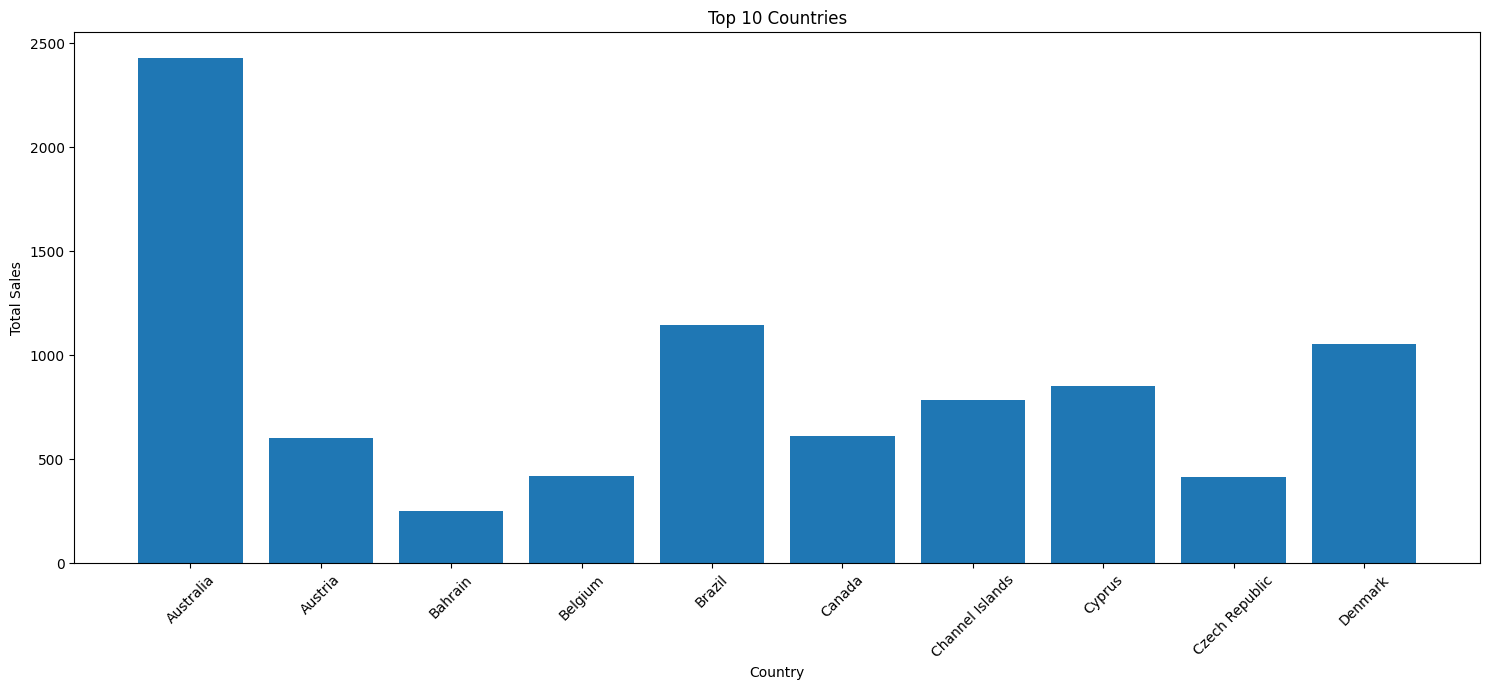

In [153]:
plt.figure(figsize=(15, 7))
plt.bar(AOVCountry.head(10).index, AOVCountry.head(10).values)
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [129]:
totalCountryRevenue = newData.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

In [130]:
totalCountryRevenue

,TotalSales
Country,
United Kingdom,9003097.964
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110
Australia,138521.310
Spain,61577.110
Switzerland,57089.900
Belgium,41196.340


In [131]:
totalCountryRevenue.head(10)

,TotalSales
Country,
United Kingdom,9003097.964
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110
Australia,138521.310
Spain,61577.110
Switzerland,57089.900
Belgium,41196.340


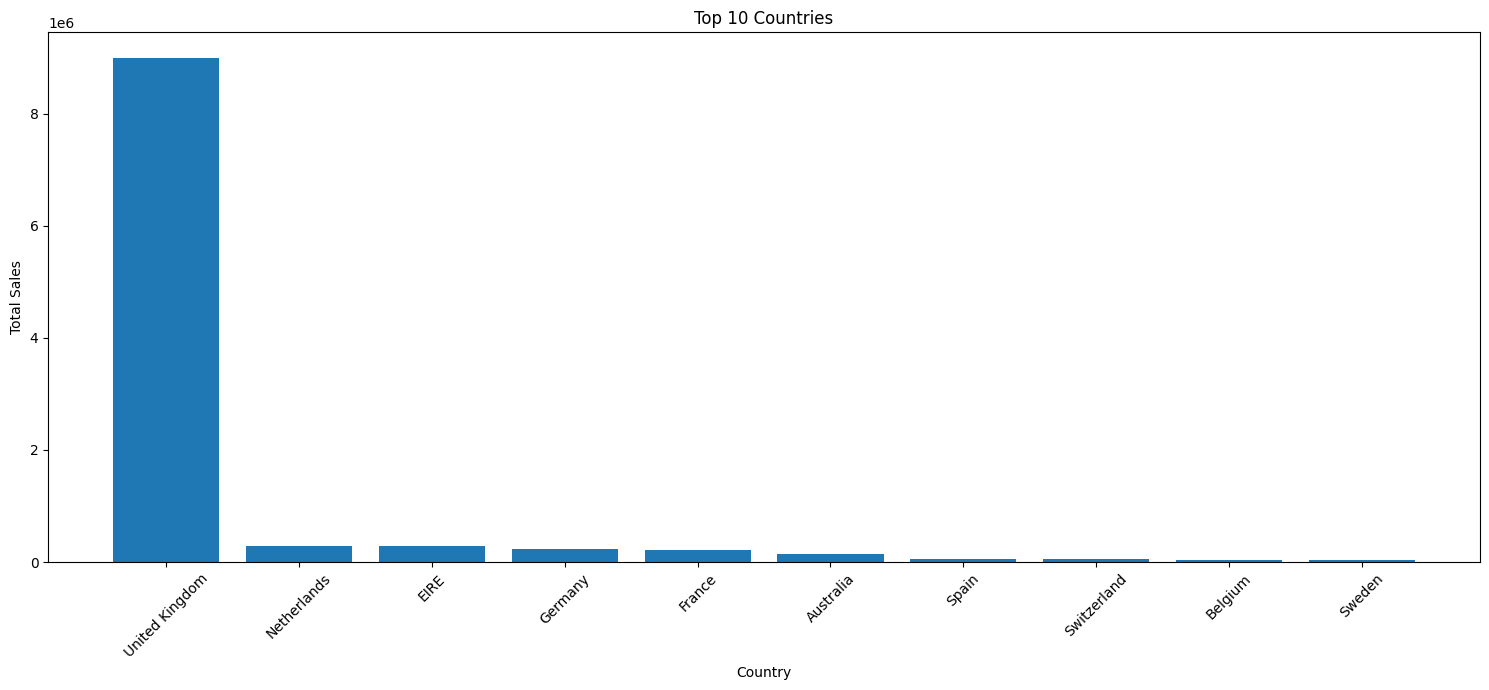

In [152]:
plt.figure(figsize=(15, 7))
plt.bar(totalCountryRevenue.head(10).index, totalCountryRevenue.head(10).values)
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [145]:
totalCountryRevenue.tail(10)

,TotalSales
Country,
Malta,2725.59
United Arab Emirates,1902.28
Lebanon,1693.88
Lithuania,1661.06
European Community,1300.25
Brazil,1143.60
RSA,1002.31
Czech Republic,826.74
Bahrain,754.14


Insights:


*   4340 unique customers where there.

*    99.08% where repeated customers so they trustted the platform.
*   503 was the average invoice rate.


*   UK was the country with highest total sales.

*   Saudi Arabia with least total sales.





**Product Performance**

In [132]:
top5Countries = AOVCountry.sort_values(ascending=False).head(5)

In [133]:
top5Countries

,TotalSales
Country,
Singapore,3039.898571
Netherlands,3004.698316
Australia,2430.198421
Japan,1969.282632
Lebanon,1693.880000


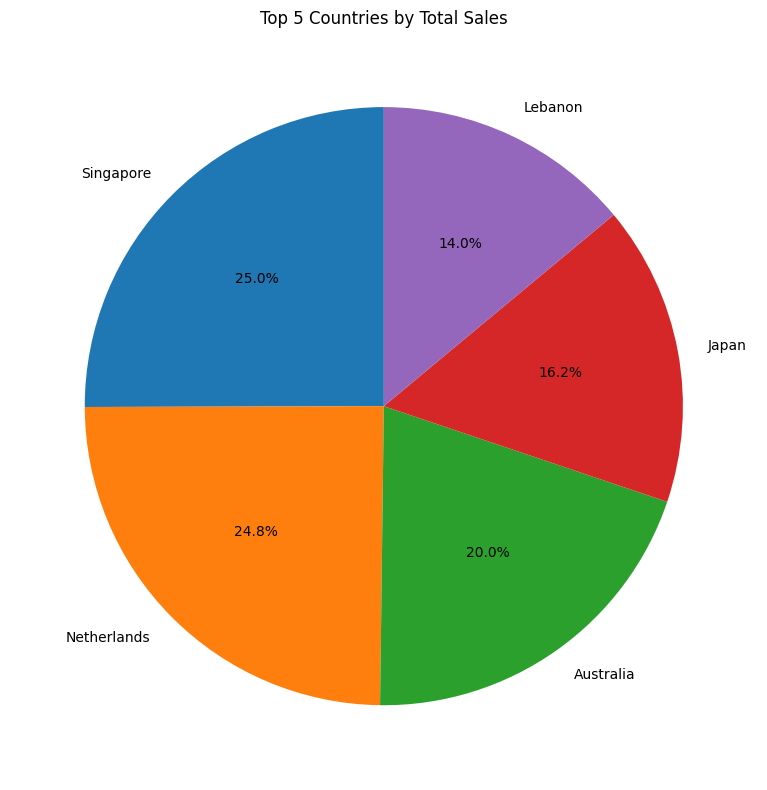

In [149]:
plt.figure(figsize=(8, 8))
plt.pie(top5Countries, labels=top5Countries.index, autopct='%1.1f%%', startangle=90,)
plt.title('Top 5 Countries by Total Sales')
plt.tight_layout()
plt.show()

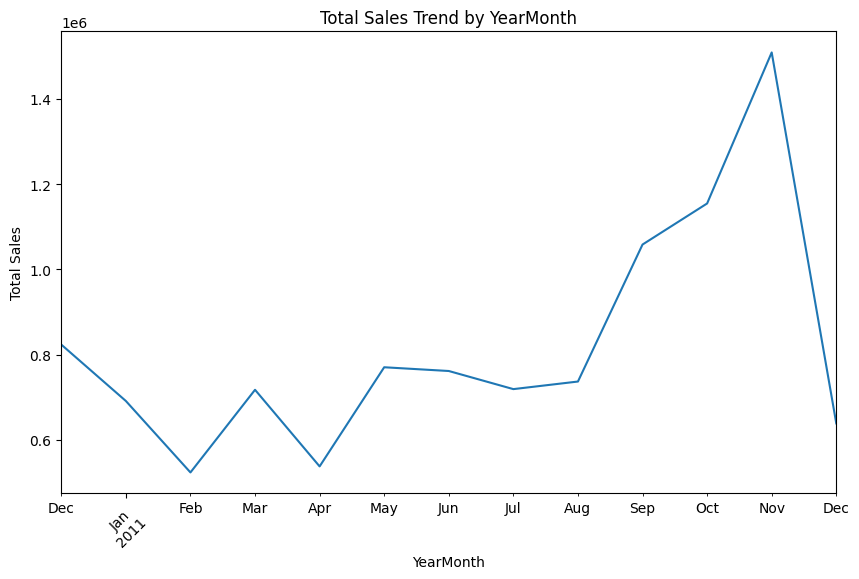

In [142]:
salesTrend = newData.groupby('YearMonth')['TotalSales'].sum()

plt.figure(figsize=(10,6))
salesTrend.plot(kind='line')
plt.title('Total Sales Trend by YearMonth')
plt.xlabel('YearMonth')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [146]:
newData.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'YearMonth'],
      dtype='object')

In [157]:
import seaborn as sns

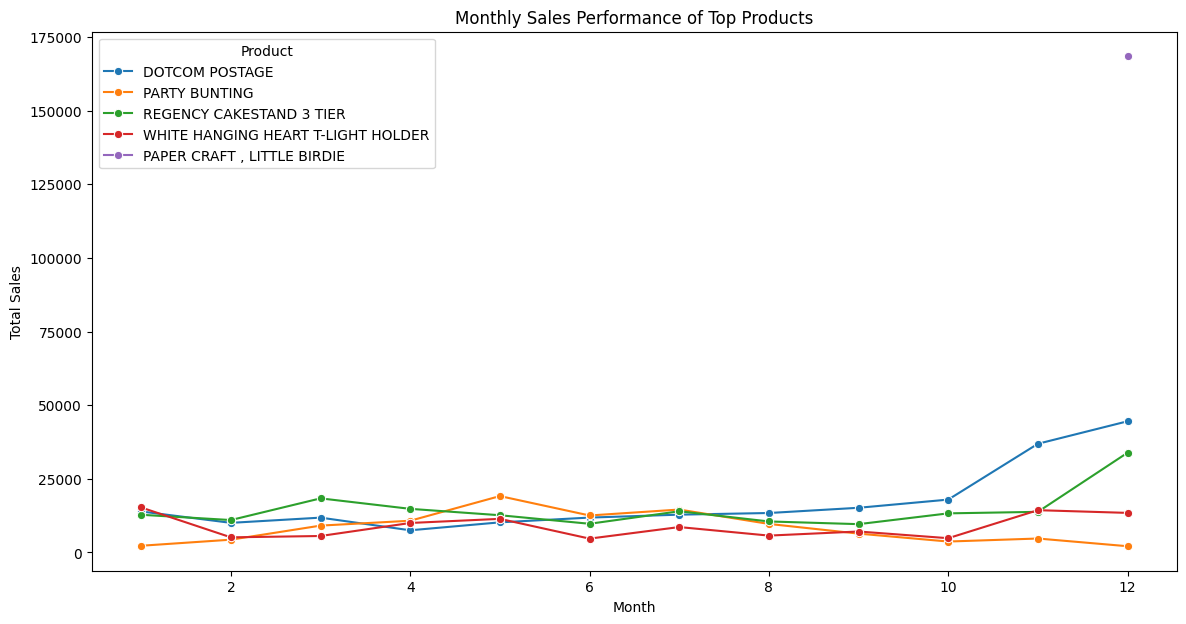

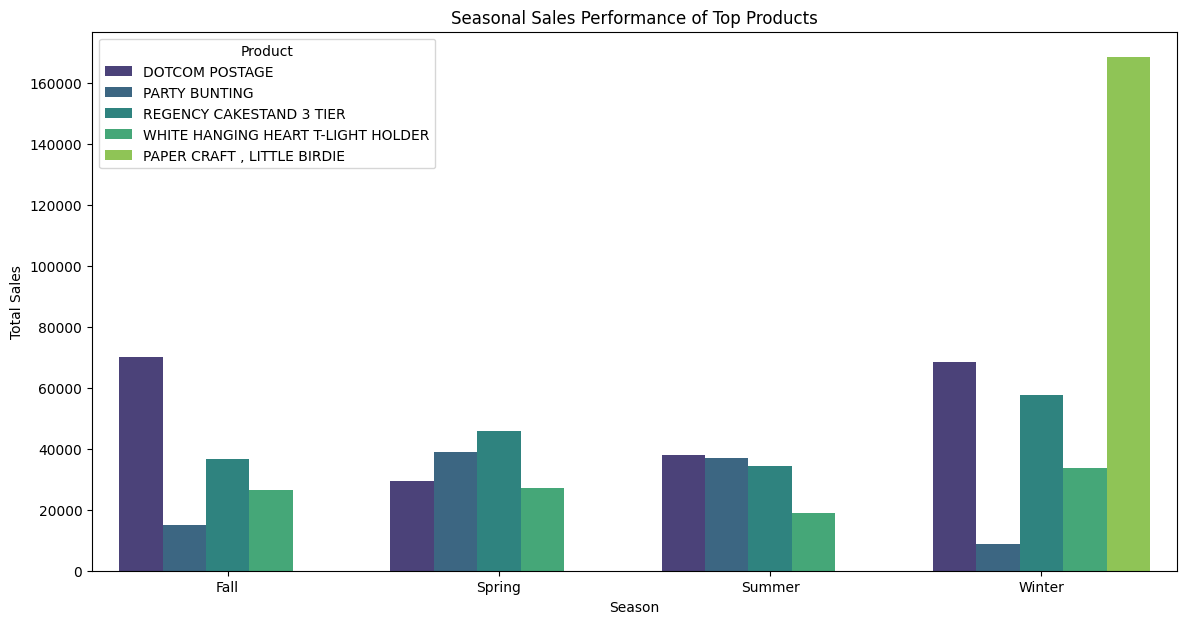

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

newData.loc[:, 'Month'] = newData['InvoiceDate'].dt.month
newData.loc[:, 'Season'] = newData['Month'].apply(get_season)

monthly_product_sales = newData.groupby(['Month', 'Description'])['TotalSales'].sum().reset_index()
seasonal_product_sales = newData.groupby(['Season', 'Description'])['TotalSales'].sum().reset_index()

top_products = monthly_product_sales.groupby('Description')['TotalSales'].sum().nlargest(5).index
top_monthly_sales = monthly_product_sales[monthly_product_sales['Description'].isin(top_products)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=top_monthly_sales, x='Month', y='TotalSales', hue='Description', marker='o')
plt.title('Monthly Sales Performance of Top Products')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.show()

top_seasonal_sales = seasonal_product_sales[seasonal_product_sales['Description'].isin(top_products)]

plt.figure(figsize=(14, 7))
sns.barplot(data=top_seasonal_sales, x='Season', y='TotalSales', hue='Description', palette='viridis')
plt.title('Seasonal Sales Performance of Top Products')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.show()


Insights:


*   Dotcom Postage and Regency cakestand perfomed average in every seasons

*   paper craft and little birdie sales went up in winter season


